# About - Dataset:
### The dataset provided for this project is focused on heart failure, a critical medical condition characterized by
the heart's inability to pump blood effectively, leading to inadequate circulation throughout the body. Here's an
overview of the dataset:m

# Title: Heart Failure Clinical Records Dataset
### Source: The dataset was collected at the Faisalabad Institute of Cardiology and the Allied Hospital in
Faisalabad, Punjab, Pakistan, during the period of April to December in 2015. It was later made available on
Kaggle.


Description: The dataset comprises medical records of 299 patients diagnosed with heart failure. These records
include various clinical, body, and lifestyle information of the patients. The dataset encompasses 13 features,
providing insights into the patients' health status and potential risk factors for heart failure

# Features:
###Age: The age of the patient (numeric).

Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

Platelets: Platelet count in the blood (numeric).

Serum Creatinine: Level of creatinine in the blood (numeric).

Serum Sodium: Level of sodium in the blood (numeric).

Sex: Gender of the patient (binary: 0 for female, 1 for male).

Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

Time: Follow-up period (in days) for the patient's condition (numeric)

# Death Event:
### Indicates whether the patient died during the follow-up period (binary: 0 for no, 1 for yes).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


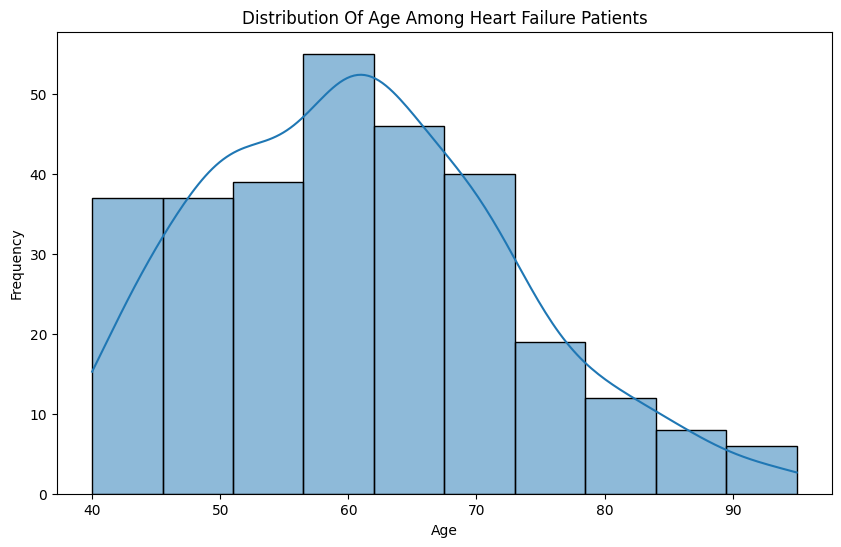

In [2]:
#1.Distribution of Age Among Heart Failure Patients:
plt.figure(figsize=(10,6))
sns.histplot(data['age'],bins=10, kde=True)
plt.title("Distribution Of Age Among Heart Failure Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

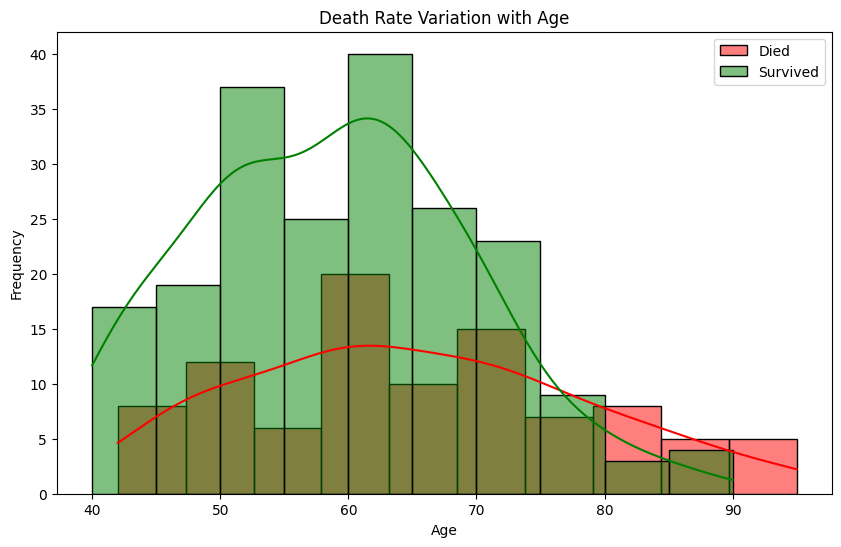

In [3]:
#2.Death Rate Variation with Age:

plt.figure(figsize=(10, 6))
sns.histplot(data[data['DEATH_EVENT'] == 1]['age'], bins=10, kde=True, color='red', label='Died')
sns.histplot(data[data['DEATH_EVENT'] == 0]['age'], bins=10, kde=True, color='green', label='Survived')
plt.title("Death Rate Variation with Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [4]:
#3.Percentage of Male and Female Patients:

gender_counts = data['sex'].value_counts(normalize=True) * 100
print("Percentage of Male Patients:", gender_counts[1])
print("Percentage of Female Patients:", gender_counts[0])


Percentage of Male Patients: 64.88294314381271
Percentage of Female Patients: 35.11705685618729


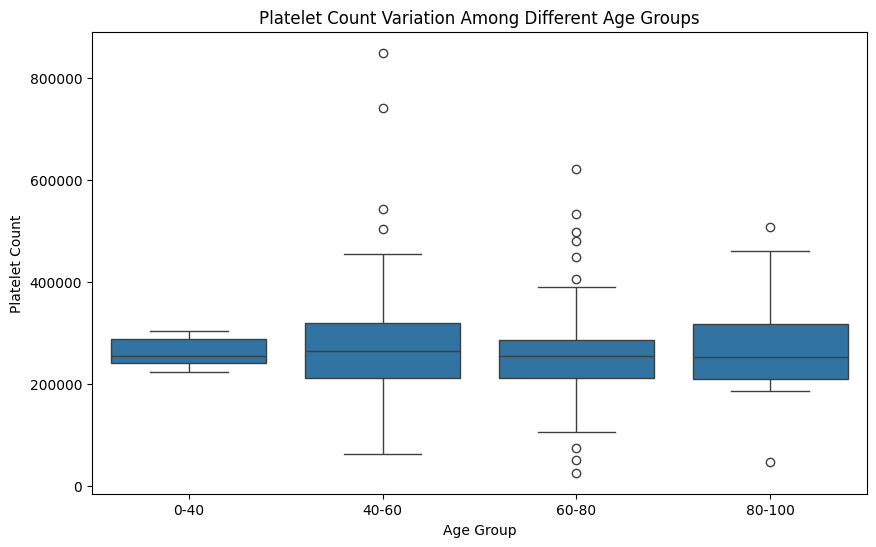

In [5]:
#4.Platelet Count Variation Among Different Age Groups:
age_groups = pd.cut(data['age'], bins=[0, 40, 60, 80, 100], labels=['0-40', '40-60', '60-80', '80-100'])
plt.figure(figsize=(10, 6))
sns.boxplot(x=age_groups, y='platelets', data=data)
plt.title("Platelet Count Variation Among Different Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Platelet Count")
plt.show()



Correlation between creatinine and sodium levels: -0.18909521009117386


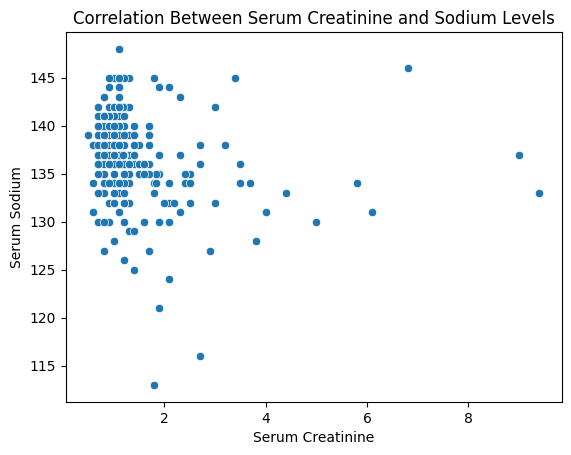

In [6]:
#5.Correlation Between Creatinine and Sodium Levels:
correlation = data['serum_creatinine'].corr(data['serum_sodium'])
print("Correlation between creatinine and sodium levels:", correlation)
sns.scatterplot(x='serum_creatinine', y='serum_sodium', data=data)
plt.title("Correlation Between Serum Creatinine and Sodium Levels")
plt.xlabel("Serum Creatinine")
plt.ylabel("Serum Sodium")
plt.show()



In [7]:
#6.Prevalence of High Blood Pressure Between Male and Female Patients:
hbp_by_gender = data.groupby('sex')['high_blood_pressure'].mean() * 100
print("High Blood Pressure Prevalence Among Male Patients:", hbp_by_gender[1])
print("High Blood Pressure Prevalence Among Female Patients:", hbp_by_gender[0])


High Blood Pressure Prevalence Among Male Patients: 31.443298969072163
High Blood Pressure Prevalence Among Female Patients: 41.904761904761905


DEATH_EVENT          0          1
smoking                          
0            67.487685  32.512315
1            68.750000  31.250000


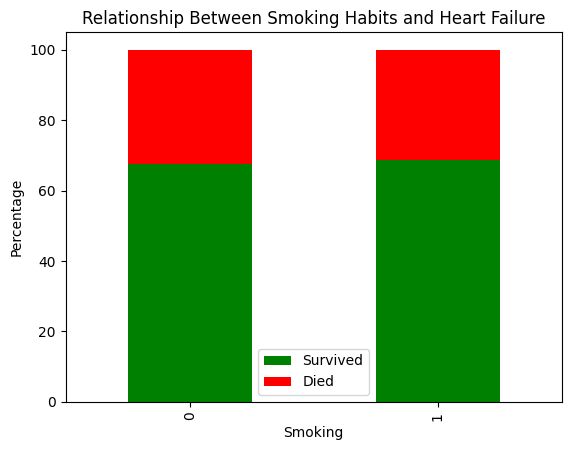

In [8]:
#7.Relationship Between Smoking Habits and Heart Failure:
smoking_vs_death = pd.crosstab(data['smoking'], data['DEATH_EVENT'], normalize='index') * 100
print(smoking_vs_death)
smoking_vs_death.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title("Relationship Between Smoking Habits and Heart Failure")
plt.xlabel("Smoking")
plt.ylabel("Percentage")
plt.legend(["Survived", "Died"])
plt.show()


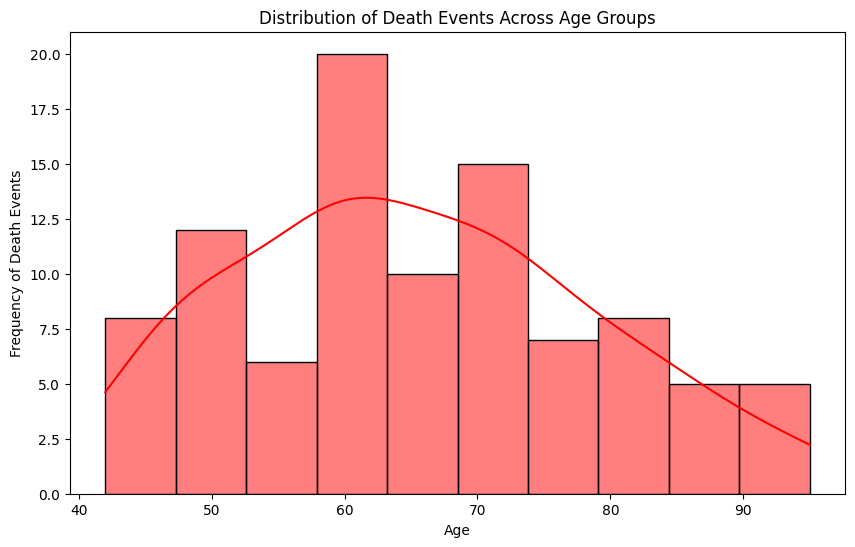

In [9]:
#8.Patterns in Death Events Across Different Age Groups:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['DEATH_EVENT'] == 1]['age'], bins=10, kde=True, color='red')
plt.title("Distribution of Death Events Across Age Groups")
plt.xlabel("Age")
plt.ylabel("Frequency of Death Events")
plt.show()



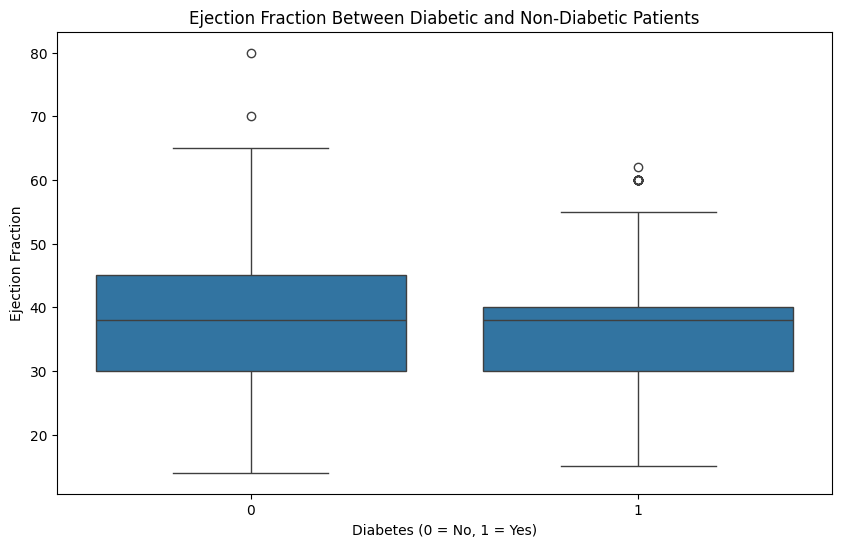

In [10]:
#9.Difference in Ejection Fraction Between Diabetic and Non-Diabetic Patients:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=data)
plt.title("Ejection Fraction Between Diabetic and Non-Diabetic Patients")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Ejection Fraction")
plt.show()



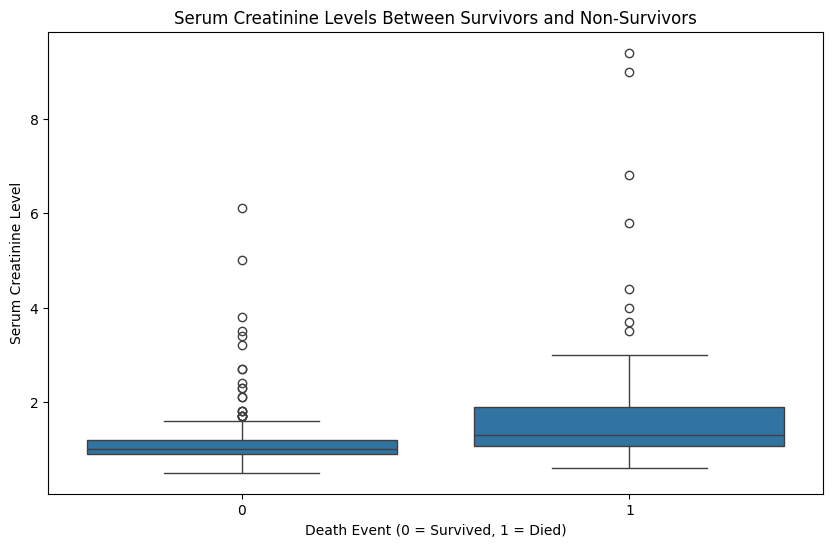

In [11]:
#10.Serum Creatinine Levels Between Survivors and Non-Survivors:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data)
plt.title("Serum Creatinine Levels Between Survivors and Non-Survivors")
plt.xlabel("Death Event (0 = Survived, 1 = Died)")
plt.ylabel("Serum Creatinine Level")
plt.show()
